![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# Ejercicio opcional de Preprocesamiento

Recibimos un dataset con información sobre la cancelación de servicios y atributos de clientes que han contratado el servicio de una empresa de telecomunicaciones. En este ejercicio deberás analizar y preparar dicho dataset para entrenar un modelo de Machine Learning que sirva para predecir la tasa de cancelación.

Cada fila del dataset representa un cliente, y cada columna es una atributo de dicho cliente. El dataset contiene la siguiente información:

- **State**: Estado donde vive el cliente.
- **Account length**: Hace cuánto tiempo el cliente contrato el servicio (en días).
- **Area code**: Código de área
- **International plan**: ¿El cliente ha contratado un plan internacional?
- **Voice mail plan**: ¿El cliente ha contratado un plan de buzón de voz?
- **Number vmail messages**: Número de mensajes de voz que ha recibido
- **Total day minutes**: Minutos gastados en llamadas nacionales
- **Total day calls**: Número de llamadas nacionales realizadas
- **Total day charge**: Cargos nacionales
- **Total intl minutes**: Minutos gastados en llamadas internacionales
- **Total intl calls**: Número de llamadas internacionales
- **Total intl charge**: Cargos internacionales
- **Customer service calls**: Llamadas al servicio de cliente
- **Client type**: Tipo de cliente (frequent caller, moderate caller, infrequent caller)
- **Churn**: ¿El usuario canceló el servicio?

## Importar librerias

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

## Leer datos y realizar revisiones generales

In [ ]:
df = pd.read_csv("churn_telco.csv")
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [ ]:
df.columns = df.columns.str.lower()
df = df.rename(columns=lambda x: x.replace(' ', '_'))
column_names = df.columns.tolist()
column_names = [name.rstrip() for name in column_names]
df.columns = column_names

In [ ]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,client_type,churn
0,LA,117,408,No,No,0,184.5,97,31.37,8.7,4,2.35,1,moderate_caller,False
1,IN,65,415,No,No,0,129.1,137,21.95,12.7,6,3.43,4,frequent_caller,True
2,NY,161,415,No,No,0,332.9,67,56.59,5.4,9,1.46,4,infrequent_caller,True
3,SC,111,415,No,No,0,110.4,103,18.77,7.7,6,2.08,2,moderate_caller,False
4,HI,49,510,No,No,0,119.3,117,20.28,11.1,1,3.00,1,frequent_caller,False


In [ ]:
df.tail()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,client_type,churn
662,WI,114,415,No,Yes,26,8225,88,23.310000,690,7,3.11,2,infrequent_caller,False
663,AL,106,408,No,Yes,29,10861,131,30.775419,485,3,2.19,1,frequent_caller,False
664,VT,60,415,No,No,0,11634,118,32.960000,791,8,3.56,3,frequent_caller,False
665,WV,159,415,No,No,0,10188,114,28.870000,695,4,3.13,1,frequent_caller,False
666,CT,184,510,Yes,No,0,12828,105,36.350000,300,10,1.35,2,moderate_caller,False


In [ ]:
df.describe()
# No hay el mismo número de valores en todas las filas

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,667.000000,667.000000,667.000000,657.000000,667.000000,657.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,181.028463,100.937031,30.775419,10.238381,4.439280,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.000102,20.396790,9.350029,2.807850,2.525037,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.400000,87.500000,24.890000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.400000,101.000000,30.330000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,18.300000,18.000000,4.940000,8.000000


In [ ]:
df['total_intl_calls'] = df['total_intl_calls'].abs()

In [ ]:
null_counts = df.isnull().sum()
print(null_counts)

state                     0
account_length            0
area_code                 0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
client_type               0
churn                     0
dtype: int64


In [ ]:
media_minutes = df.total_day_minutes.mean()
df.total_day_minutes.fillna(media_minutes, inplace=True)

media_charge = df.total_day_charge.mean()
df.total_day_charge.fillna(media_charge, inplace=True)

## ¿Hay variables con valores sin sentido? Si fuese así, corrígelos

In [ ]:
""" Más arriba cambie los valores negativos por positivos."""

## ¿Hay variables con valores vacíos? Si fuese así, rellénalos

In [ ]:
df['total_day_minutes'].isnull().sum()

"""Debería salir 0 pero porque ya lo modifique unas líneas más arriba."""

0

## ¿Qué porcentaje de los clientes en el dataset han cancelado el servicio?

In [ ]:
churn_counts = df['churn'].value_counts(normalize=True) * 100
porcentaje_churned = churn_counts[True]

print(f"El {round(porcentaje_churned, 2)}% ha cancelado el servicio")

El 14.24% ha cancelado el servicio


In [ ]:
"""He convertido los valores a minutos porque creo que así es como debería mostrarse para ser más claro."""

def convert_to_minutes(time):
    hours = int(time)
    minutes = int((time - hours) * 60)
    total_minutes = hours * 60 + minutes
    return total_minutes

df['total_intl_minutes'] = df['total_intl_minutes'].apply(convert_to_minutes)
df['total_day_minutes'] = df['total_day_minutes'].apply(convert_to_minutes)

## ¿Qué variables están más correladas con `Churn`?

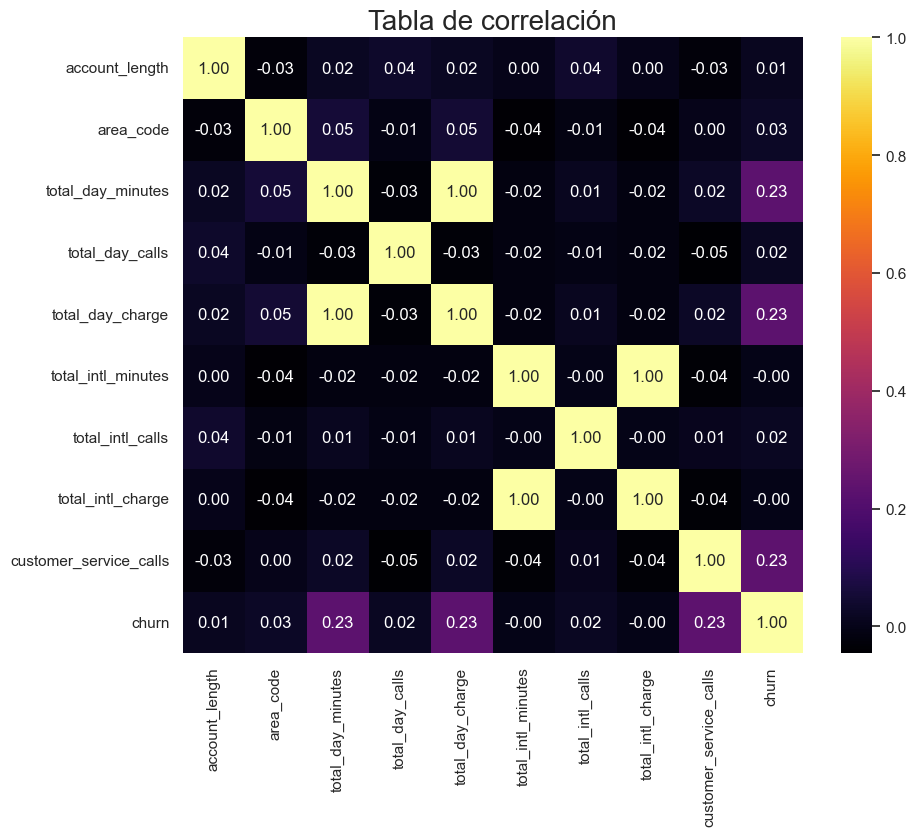

In [ ]:
columnas_relevantes = ['account_length', 'area_code', 'total_day_minutes',
                        'total_day_calls', 'total_day_charge', 'total_intl_minutes',
                        'total_intl_calls',	'total_intl_charge', 'customer_service_calls', 'churn']
df_relevantes = df[columnas_relevantes]
correlation_table = df_relevantes.corr()
plt.figure(figsize=(10, 8))
sns.set(font='Arial')
sns.heatmap(correlation_table, annot=True, fmt=".2f", cmap="inferno")
plt.title("Tabla de correlación", fontsize=20)
plt.show()

# En este caso podríamos ver que la columna'churn tiene algo de correlación con 'total_day_minutes', 'total_day_charge' y con 'customer_service_calls'
#Marcados en morado


## Haz un boxplot en el que muestres la distribución de `Total day minutes` de acuerdo a si un cliente ha cancelado el servicio o no

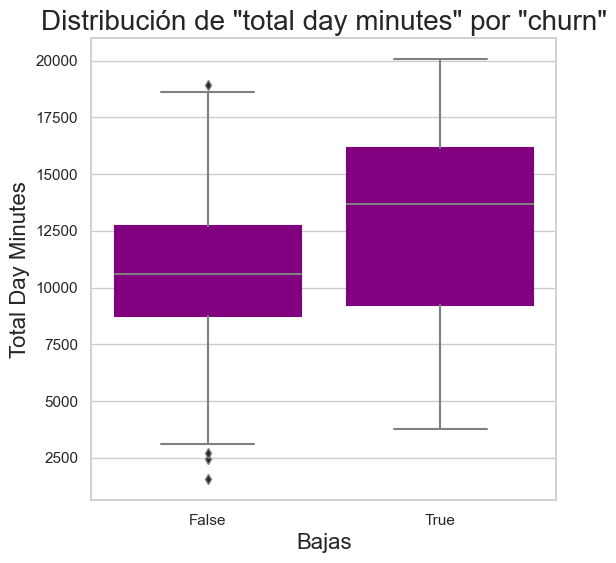

In [ ]:
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
sns.boxplot(data=df, x='churn', y='total_day_minutes',
            color="#800080",
            boxprops=dict(color="#800080"),
            whiskerprops=dict(color='grey'),
            capprops=dict(color='grey'),
            medianprops=dict(color='grey'),
            flierprops=dict(markeredgecolor='grey'))

plt.title('Distribución de "total day minutes" por "churn"', fontsize=20)
plt.xlabel('Bajas', fontsize=16)
plt.ylabel('Total Day Minutes', fontsize=16)

plt.show()


## Divide el dataset en train y test, haciendo un split 90/10

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)
print(len(train_df))
print(len(test_df))

600
67


## Crea una columna nueva en los dataset de train y test donde apliques `OrdinalEncoder` a la columna `State` (ignorar `SettingWithCopyWarning`)

In [ ]:
ordinal_encoder = OrdinalEncoder()
train_df['state_encoded'] = ordinal_encoder.fit_transform(train_df[['state']])
test_df['state_encoded'] = ordinal_encoder.transform(test_df[['state']])

Conjunto de entrenamiento:
    state  account_length  area_code international_plan voice_mail_plan  \
286    IL              31        415                 No             Yes   
60     FL             127        415                 No              No   
133    MN              55        415                 No              No   
30     NH              64        408                 No             Yes   
69     NC             135        415                 No              No   

     number_vmail_messages  total_day_minutes  total_day_calls  \
286                     28              12630              101   
60                       0              15996              106   
133                      0              10535              147   
30                      27              10925               91   
69                       0              12108               81   

     total_day_charge  total_intl_minutes  total_intl_calls  \
286             35.79                 690                 2   

## Aplicar `OneHotEncoder` a la columna `Client type` (no hace falta guardar el resultado como columnas en el dataset)

In [ ]:
one_hot_encoder = OneHotEncoder()
encoded_data = one_hot_encoder.fit_transform(df[['client_type']])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
